In [183]:
import matplotlib.pyplot as plt
import numpy as np

In [184]:
import pickle

In [402]:
ALL_RESULTS=pickle.load(open('all_results_noMon.pkl','rb'))
# Shape: [[A,B,C,TermVectorsIndex]...]

In [403]:
voc_vector=pickle.load(open('voc_vector_noMon.pkl', 'rb'))

In [404]:
B=ALL_RESULTS[0][1]

In [405]:
list_Bs=[a[1] for a in ALL_RESULTS]

In [406]:
init_B=list_Bs[0]
int_TV=ALL_RESULTS[0][3]

In [407]:
int_TV=[[t[0] for t in tvi][0:8] for tvi in int_TV]

In [408]:
from skimage import data
from skimage import filters
from skimage import exposure


In [ ]:
#fig,ax=plt.subplots(13,4,figsize=(8,8))
Relevances=[0 for e in init_B.T]
for i,b in enumerate(list_Bs[1:]):
    SelfSim=np.zeros((b.shape[1],b.shape[1]))
    for x,row in enumerate(b.T):
        for y,col in enumerate(init_B.T):
            #Keep only the 10 most influential words
            SelfSim[x,y]=np.dot(np.where(row<sorted(row)[-10], 0, row),np.where(row<sorted(col)[-10], 0, col))
            if not sum(sum(SelfSim))==0:
                val = filters.threshold_otsu(SelfSim)
                #val=0
            else:
                val=0
    #ax[i/4,i%4].pcolormesh(np.where(SelfSim>val,SelfSim,0))
    Relevances+=sum(np.where(SelfSim>val,SelfSim,0))
#plt.tight_layout()
#fig.show()

In [ ]:
plt.plot(sorted(Relevances))
plt.title('with OTSU')

In [409]:
# Only running with one comparison points gave poor results. Let's try with all the runs and at the end we can take only
# The most relevants of all topic vectors. i.e the 3 most relevants for each run e.g
All_Relevances=[]
for i,init_B in enumerate(list_Bs):
    Relevances=[0 for e in init_B.T]
    for b in [list_Bs[j] for j in range(len(list_Bs)) if j!=i]:
        SelfSim=np.zeros((b.shape[1],b.shape[1]))
        for x,row in enumerate(b.T):
            for y,col in enumerate(init_B.T):
                #Keep only the 10 most influential words
                SelfSim[x,y]=np.dot(np.where(row<sorted(row)[-10], 0, row),np.where(row<sorted(col)[-10], 0, col))
                if not sum(sum(SelfSim))==0:
                    val = filters.threshold_otsu(SelfSim)
                else:
                    val=0
        Relevances+=sum(np.where(SelfSim>val,SelfSim,0))
    All_Relevances.append(Relevances)

In [410]:
pickle.dump(All_Relevances,open('All_Relevances_noMon.pkl','wb'))
pickle.dump(SelfSim,open('SelfSim_noMon.pkl','wb'))

In [441]:
# With monuments:
All_Relevances=pickle.load(open('All_Relevances.pkl','rb'))
SelfSim=pickle.load(open('SelfSim.pkl','rb'))
ALL_RESULTS=pickle.load(open('all_results.pkl','rb'))
voc_vector=pickle.load(open('voc_vector.pkl', 'rb'))

#Without monuments:
# All_Relevances=pickle.load(open('All_Relevances_noMon.pkl','rb'))
# SelfSim=pickle.load(open('SelfSim_noMon.pkl','rb'))
# ALL_RESULTS=pickle.load(open('all_results_noMon.pkl','rb'))
# voc_vector=pickle.load(open('voc_vector_noMon.pkl', 'rb'))

In [442]:
dict_order={}
#For each row in SelfSim
for i,a in enumerate(SelfSim):
    #Build a dict that tells 'the rows that have their argmax at <key> are <values>'
    if a.argmax() in dict_order.keys():
        dict_order[a.argmax()].append(i)
    else:
        dict_order[a.argmax()]=[i]

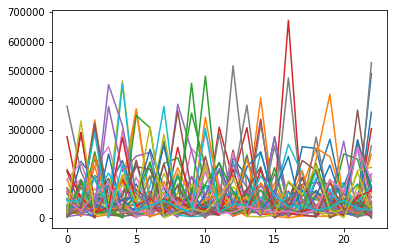

In [443]:
plt.figure()
for a in All_Relevances:
    plt.plot(a)
plt.show()

In [444]:
val_all = filters.threshold_otsu(np.asarray(All_Relevances))
#Relevances+=sum(np.where(SelfSim>val,SelfSim,0))

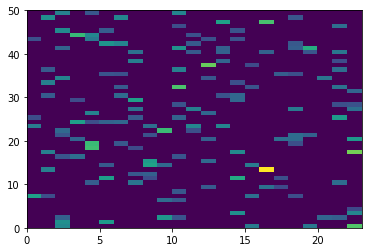

In [445]:
plt.pcolormesh(np.where(All_Relevances>val_all,All_Relevances,0))

In [446]:
AR_values=[]
for a in All_Relevances:
    for a_i in a:
        AR_values.append(a_i)
        
# Find the 23th biggest value in all values
sorted(AR_values)[::-1][23]

348613.6812421995

In [447]:
run_topic=[]
for x,row in enumerate(np.where(All_Relevances>sorted(AR_values)[::-1][250],All_Relevances,0)):
    for y,val in enumerate(row):
        if val:
            run_topic.append((x,y))

In [ ]:
# ALL_RESULTS shape: [[A,B,C,TermVectorsIndex]...]

In [448]:
for e in run_topic:
    relevant_TV=ALL_RESULTS[e[0]][3][e[1]]
    print(e, [i[0] for i in relevant_TV[0:5]])

((0, 2), [u'superga', u'basilica', u'basilicadisuperga', u'architecture', u'night'])
((0, 5), [u'superga', u'basilica', u'basilicadisuperga', u'view', u'city'])
((0, 7), [u'valentino', u'parcodelvalentino', u'parco', u'po', u'park'])
((0, 15), [u'superga', u'panorama', u'basilica', u'tramonto', u'night'])
((0, 18), [u'basket', u'palaruffini', u'basketball', u'pmstorino', u'pallacanestro'])
((0, 19), [u'venaria', u'venariareale', u'reggia', u'reggiadivenaria', u'reale'])
((0, 22), [u'basketmania', u'wwwbasketmaniaeu', u'basketmanianeverstops', u'basketball', u'basketmaniahoops'])
((1, 2), [u'superga', u'basilica', u'basilicadisuperga', u'view', u'panorama'])
((1, 5), [u'venaria', u'venariareale', u'reggia', u'reggiadivenaria', u'reale'])
((1, 11), [u'basketmania', u'wwwbasketmaniaeu', u'basketball', u'nba', u'basketmanianeverstops'])
((2, 2), [u'basketmania', u'basketball', u'basketmanianeverstops', u'wwwbasketmaniaeu', u'nba'])
((2, 9), [u'superga', u'basilica', u'basilicadisuperga', u

In [449]:
All_rel_arr=np.array(All_Relevances)

In [450]:
ALL_TVs=[e[3] for e in ALL_RESULTS]
#Keep only the first 5 words in the TVs
ALL_TVs=[[[i[0] for i in e][0:10] for e in A] for A in ALL_TVs]

In [451]:
All_rel_arr=np.array(All_Relevances)
Rel_coords=[]
Rel_vals=[]
Rel_tps=[]
for tp in range(24):
    x_max,y_max=All_rel_arr.argmax()/All_rel_arr.shape[1],All_rel_arr.argmax()%All_rel_arr.shape[1]
    tp_voc=ALL_TVs[x_max][y_max]
    tp_val=All_rel_arr.max()
    for run,topics in enumerate(ALL_TVs):
        for vector,topic in enumerate(topics):
            if sum([w in topic for w in tp_voc])>1:
                All_rel_arr[run,vector]=0
    Rel_coords.append((x_max,y_max))
    Rel_vals.append(tp_val)
    Rel_tps.append(tp_voc[0:10])
    print tp_val,tp_voc

672496.259558 [u'basketmania', u'wwwbasketmaniaeu', u'basketmanianeverstops', u'basketball', u'nba', u'basketmaniahoops', u'adidas', u'adidasbasketball', u'store', u'nike']
528144.778347 [u'basket', u'palaruffini', u'basketball', u'pmstorino', u'pallacanestro', u'pms', u'auxilium', u'seriea', u'gialloblu', u'campionato']
482503.354954 [u'superga', u'basilica', u'basilicadisuperga', u'panorama', u'piemonte', u'view', u'architecture', u'church', u'landscape', u'juvarra']
366998.062033 [u'venaria', u'venariareale', u'reggia', u'reggiadivenaria', u'reale', u'piemonte', u'art', u'palmirascake', u'galleria', u'royal']
314562.430044 [u'sushi', u'dinner', u'japanese', u'sushitime', u'sashimi', u'shizen', u'lunch', u'metroquadro', u'metroquadroabbigliamento', u'japanesefood']
225018.696945 [u'tattoo', u'ink', u'torinotattoo', u'inked', u'tattoos', u'colortattoo', u'traditionaltattoo', u'traditional', u'neotraditional', u'eternatraccia']
208366.380924 [u'valentino', u'parcodelvalentino', u'parco

In [452]:
f=open('most_relevant_topics_50runs.txt','w')
for r in Rel_tps:
    f.write('_'.join(r).encode('utf-8')+' \n')
f.close()

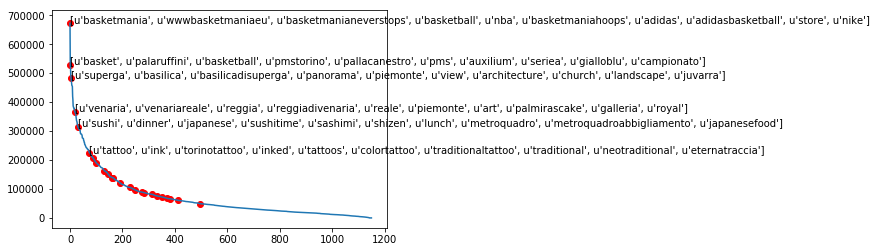

In [453]:
Rel_vals_plot=[]
for i,j in enumerate(sorted(AR_values)[::-1]):
    if j in Rel_vals:
        Rel_vals_plot.append(i)

plt.plot(sorted(AR_values)[::-1])
plt.scatter(Rel_vals_plot,Rel_vals, c='r')
for i in range(6):
    plt.annotate(Rel_tps[i],(Rel_vals_plot[i],Rel_vals[i]))
#plt.savefig('most_relevant_topics_50runs_noMon.pdf')